# Imports

In [10]:
# Bike Sharing Demand Prediction - Linear Regression Analysis

# Mission: Sustainable Urban Mobility - Predicting Bike Rental Demand  
# Problem: Predict daily bike rentals to optimize bike availability and reduce urban congestion.

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Data loading

In [11]:
# Load the datasets
print("📊 Loading datasets...")
day_data = pd.read_csv('../../day.csv')
hour_data = pd.read_csv('../../hour.csv')

print(f"Day dataset shape: {day_data.shape}")
print(f"Hour dataset shape: {hour_data.shape}")

# Display basic information
print("\n📋 Day dataset info:")
print(day_data.info())

print("\n📊 Day dataset head:")
display(day_data.head())

📊 Loading datasets...
Day dataset shape: (731, 16)
Hour dataset shape: (17379, 17)

📋 Day dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Data visualizations

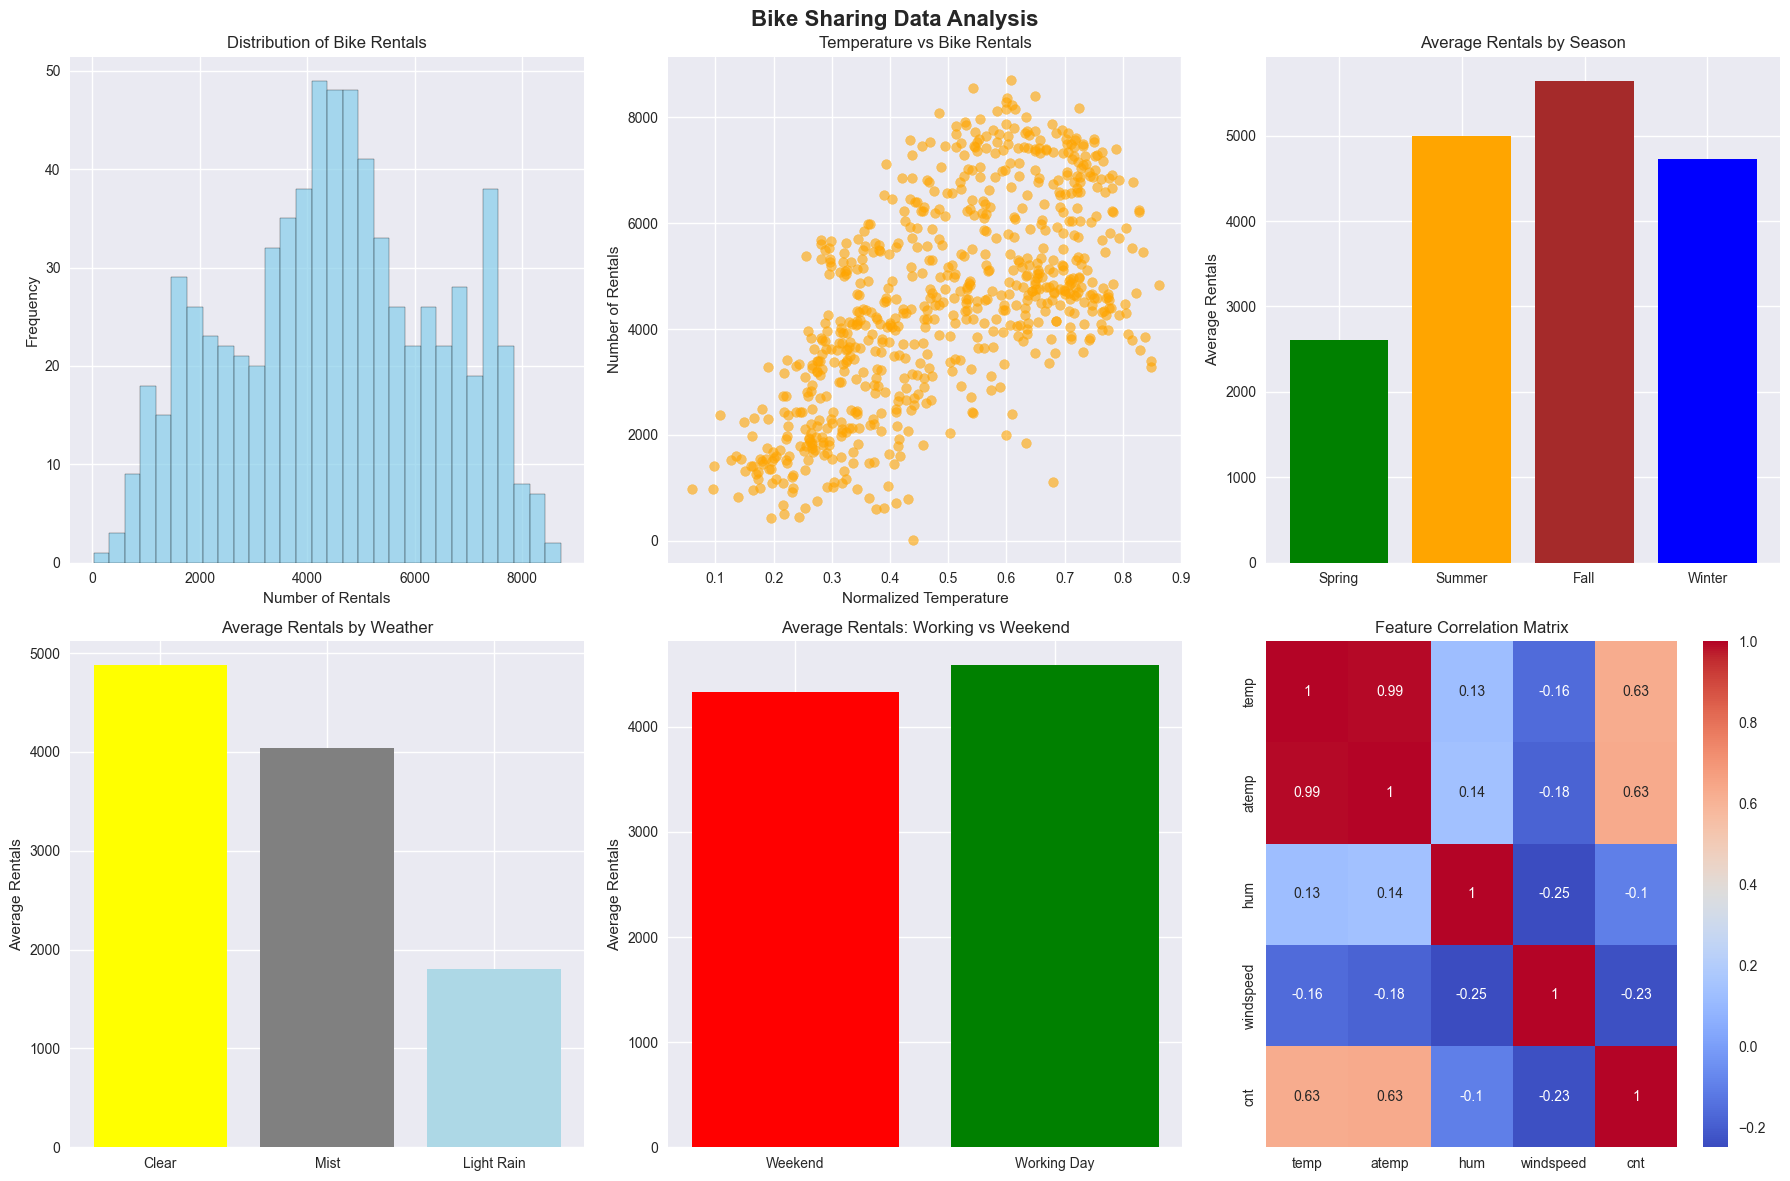

📈 Key Insights from Visualizations:
1. Temperature has the strongest positive correlation with bike rentals
2. Summer and Fall seasons have higher rental demand
3. Clear weather significantly increases rentals
4. Working days have higher demand than weekends
5. Humidity has a negative correlation with rentals

🌤️ Weather conditions in dataset: [1, 2, 3]
📊 Weather rental averages: [np.float64(4876.7861771058315), np.float64(4035.862348178138), np.float64(1803.2857142857142)]


In [12]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bike Sharing Data Analysis', fontsize=16, fontweight='bold')

# 1. Target variable distribution
axes[0, 0].hist(day_data['cnt'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Bike Rentals')
axes[0, 0].set_xlabel('Number of Rentals')
axes[0, 0].set_ylabel('Frequency')

# 2. Temperature vs Rentals
axes[0, 1].scatter(day_data['temp'], day_data['cnt'], alpha=0.6, color='orange')
axes[0, 1].set_title('Temperature vs Bike Rentals')
axes[0, 1].set_xlabel('Normalized Temperature')
axes[0, 1].set_ylabel('Number of Rentals')

# 3. Season analysis
season_rentals = day_data.groupby('season')['cnt'].mean()
axes[0, 2].bar(['Spring', 'Summer', 'Fall', 'Winter'], season_rentals.values, color=['green', 'orange', 'brown', 'blue'])
axes[0, 2].set_title('Average Rentals by Season')
axes[0, 2].set_ylabel('Average Rentals')

# 4. Weather impact - FIXED to handle actual weather conditions
weather_rentals = day_data.groupby('weathersit')['cnt'].mean()
weather_labels = ['Clear', 'Mist', 'Light Rain', 'Heavy Rain']
weather_colors = ['yellow', 'gray', 'lightblue', 'darkblue']

# Only use the labels and colors for the weather conditions that exist in the data
actual_weather_labels = weather_labels[:len(weather_rentals)]
actual_weather_colors = weather_colors[:len(weather_rentals)]

axes[1, 0].bar(actual_weather_labels, weather_rentals.values, color=actual_weather_colors)
axes[1, 0].set_title('Average Rentals by Weather')
axes[1, 0].set_ylabel('Average Rentals')

# 5. Working day vs Weekend
working_rentals = day_data.groupby('workingday')['cnt'].mean()
axes[1, 1].bar(['Weekend', 'Working Day'], working_rentals.values, color=['red', 'green'])
axes[1, 1].set_title('Average Rentals: Working vs Weekend')
axes[1, 1].set_ylabel('Average Rentals')

# 6. Correlation heatmap
correlation_matrix = day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1, 2])
axes[1, 2].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

print("📈 Key Insights from Visualizations:")
print("1. Temperature has the strongest positive correlation with bike rentals")
print("2. Summer and Fall seasons have higher rental demand")
print("3. Clear weather significantly increases rentals")
print("4. Working days have higher demand than weekends")
print("5. Humidity has a negative correlation with rentals")

# Print actual weather conditions found in the data
print(f"\n🌤️ Weather conditions in dataset: {list(weather_rentals.index)}")
print(f"📊 Weather rental averages: {list(weather_rentals.values)}")

# Feature engineering

In [13]:
# Data preprocessing and feature engineering
print("Preprocessing data...")
df = day_data.copy()

# Drop instant column (not useful for prediction)
df = df.drop('instant', axis=1)

# Convert dteday to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Extract additional temporal features
df['day_of_year'] = df['dteday'].dt.dayofyear
df['month'] = df['dteday'].dt.month
df['day_of_week'] = df['dteday'].dt.dayofweek

# Create interaction features (important for linear regression)
df['temp_humidity'] = df['temp'] * df['hum']
df['temp_windspeed'] = df['temp'] * df['windspeed']
df['weather_temp'] = df['weathersit'] * df['temp']

# Create seasonal temperature features
df['spring_temp'] = (df['season'] == 1) * df['temp']
df['summer_temp'] = (df['season'] == 2) * df['temp']
df['fall_temp'] = (df['season'] == 3) * df['temp']
df['winter_temp'] = (df['season'] == 4) * df['temp']

# Select features for modeling
feature_columns = [
    'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
    'temp', 'atemp', 'hum', 'windspeed', 'day_of_year', 'month', 'day_of_week',
    'temp_humidity', 'temp_windspeed', 'weather_temp',
    'spring_temp', 'summer_temp', 'fall_temp', 'winter_temp'
]

X = df[feature_columns]
y = df['cnt']

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Number of features: {len(feature_columns)}")

# Display feature importance (correlation with target)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Correlation': [abs(X[col].corr(y)) for col in feature_columns]
}).sort_values('Correlation', ascending=False)

print("\n Feature Importance (Correlation with Target):")
display(feature_importance)

Preprocessing data...
Feature matrix shape: (731, 21)
Target variable shape: (731,)
Number of features: 21

 Feature Importance (Correlation with Target):


,Feature,Correlation
8,atemp,0.631066
7,temp,0.627494
1,yr,0.566710
14,temp_humidity,0.450343
17,spring_temp,0.434869
0,season,0.406100
19,fall_temp,0.342733
6,weathersit,0.297391
15,temp_windspeed,0.286312
2,mnth,0.279977


# Data standardization

In [14]:
# Data splitting and standardization
print("⚖️ Splitting and scaling data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("✅ Data standardized using StandardScaler")

⚖️ Splitting and scaling data...
Training set shape: (584, 21)
Test set shape: (147, 21)
✅ Data standardized using StandardScaler


# Model training and comparison

In [15]:
# Train multiple models
print("Training models...")

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_r2 = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

# Display model comparison
print("\n📈 Model Comparison:")
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R² Score': [lr_r2, dt_r2, rf_r2],
    'MAE': [lr_mae, dt_mae, rf_mae],
    'MSE': [lr_mse, dt_mse, rf_mse]
})
display(comparison_df.round(4))

Training models...



📈 Model Comparison:


,Model,R² Score,MAE,MSE
0,Linear Regression,0.8246,623.7265,703370.0531
1,Decision Tree,0.7765,643.1655,896182.9004
2,Random Forest,0.8851,425.2962,460828.9797


# Loss curves

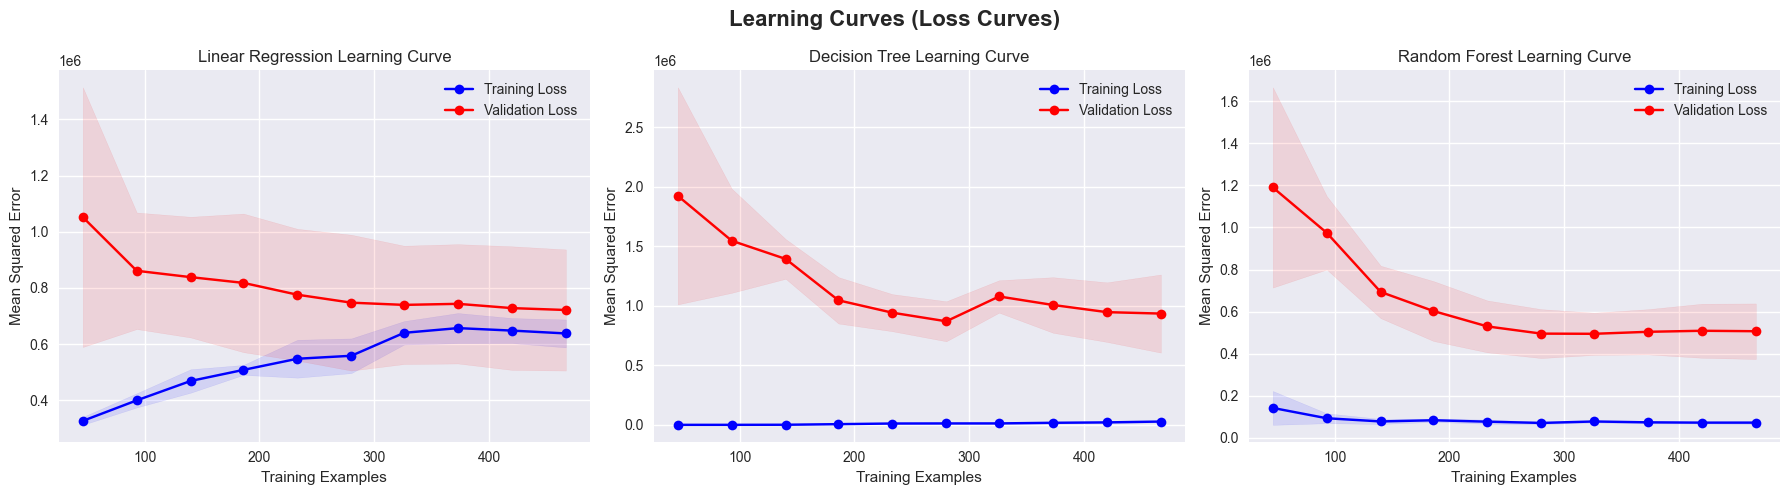

📊 Learning Curve Analysis:
• Linear Regression: Shows typical learning curve with convergence
• Decision Tree: May show overfitting with large gap between train/validation
• Random Forest: Generally more stable learning curve


In [16]:
# Plot learning curves for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Learning Curves (Loss Curves)', fontsize=16, fontweight='bold')

models = [
    ('Linear Regression', lr_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model)
]

for idx, (name, model) in enumerate(models):
    # Calculate learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_scaled, y_train, cv=5, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error'
    )
    
    # Calculate mean and std
    train_mean = -train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = -test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)
    
    # Plot
    axes[idx].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Loss')
    axes[idx].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    axes[idx].plot(train_sizes, test_mean, 'o-', color='red', label='Validation Loss')
    axes[idx].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
    
    axes[idx].set_title(f'{name} Learning Curve')
    axes[idx].set_xlabel('Training Examples')
    axes[idx].set_ylabel('Mean Squared Error')
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

print("📊 Learning Curve Analysis:")
print("• Linear Regression: Shows typical learning curve with convergence")
print("• Decision Tree: May show overfitting with large gap between train/validation")
print("• Random Forest: Generally more stable learning curve")

# Scatter plots

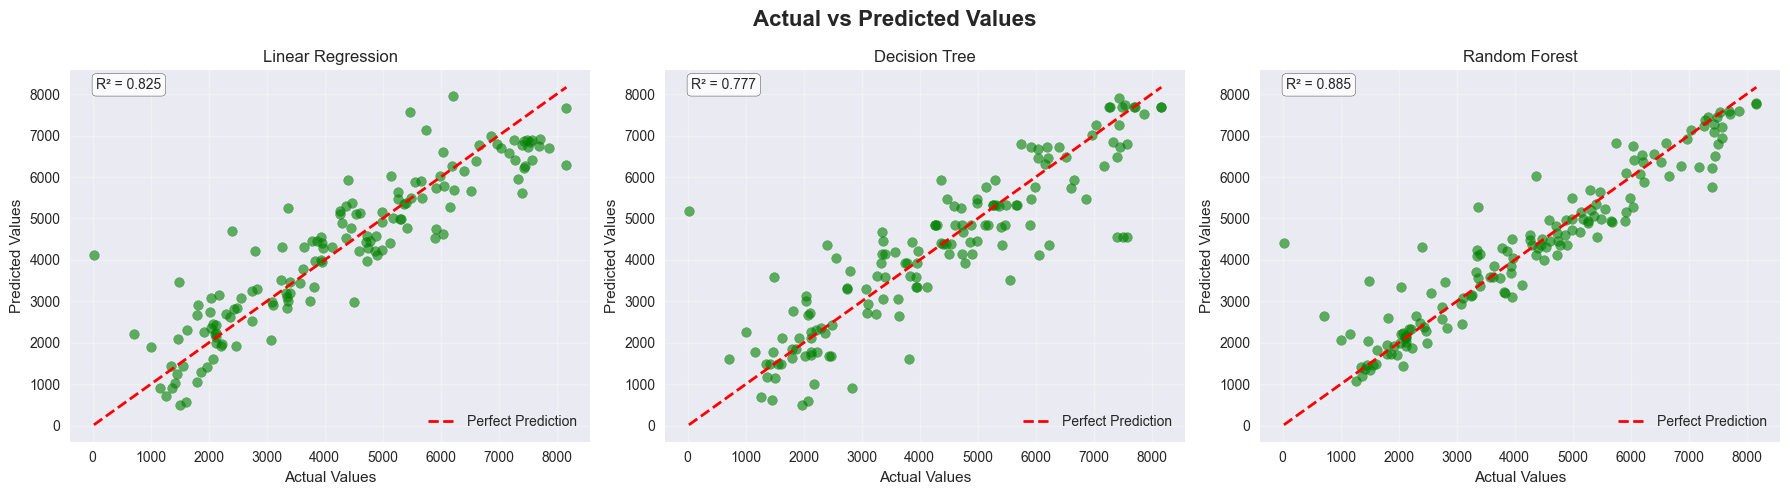

📈 Scatter Plot Analysis:
• Points closer to the red line indicate better predictions
• Linear Regression shows linear relationship as expected
• Random Forest shows better fit with higher R² score


In [17]:
# Create scatter plots showing actual vs predicted values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Actual vs Predicted Values', fontsize=16, fontweight='bold')

predictions = [lr_pred, dt_pred, rf_pred]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

for idx, (pred, name) in enumerate(zip(predictions, model_names)):
    # Plot actual vs predicted
    axes[idx].scatter(y_test, pred, alpha=0.6, color='green')
    
    # Add perfect prediction line
    min_val = min(y_test.min(), pred.min())
    max_val = max(y_test.max(), pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Actual Values')
    axes[idx].set_ylabel('Predicted Values')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    
    # Add R² score to plot
    r2 = r2_score(y_test, pred)
    axes[idx].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[idx].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("📈 Scatter Plot Analysis:")
print("• Points closer to the red line indicate better predictions")
print("• Linear Regression shows linear relationship as expected")
print("• Random Forest shows better fit with higher R² score")

# Model selection and saving

In [18]:
# Select the best performing model
models = {
    'Linear Regression': (lr_model, lr_r2),
    'Decision Tree': (dt_model, dt_r2),
    'Random Forest': (rf_model, rf_r2)
}

best_model_name = max(models.keys(), key=lambda x: models[x][1])
best_model = models[best_model_name][0]

print(f"🏆 Best Model: {best_model_name}")
print(f"R² Score: {models[best_model_name][1]:.4f}")
print(f"MAE: {mean_absolute_error(y_test, models[best_model_name][0].predict(X_test_scaled)):.2f}")

# Save the best model and related files using pickle
print("\n Saving models with pickle...")
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

print("✅ Models saved successfully using pickle!")
print("📁 Files created:")
print("   - best_model.pkl")
print("   - scaler.pkl")
print("   - feature_columns.pkl")

🏆 Best Model: Random Forest
R² Score: 0.8851
MAE: 425.30

 Saving models with pickle...
✅ Models saved successfully using pickle!
📁 Files created:
   - best_model.pkl
   - scaler.pkl
   - feature_columns.pkl


# Prediction function test

In [19]:
# Test the prediction function
print(" Testing prediction function...")

# Sample test data
test_data = {
    'season': 2, 'yr': 1, 'mnth': 6, 'holiday': 0, 'weekday': 1,
    'workingday': 1, 'weathersit': 1, 'temp': 0.5, 'atemp': 0.5,
    'hum': 0.6, 'windspeed': 0.2, 'day_of_year': 150, 'month': 6, 'day_of_week': 1
}

# Create feature vector
test_features = np.array([
    test_data['season'], test_data['yr'], test_data['mnth'], test_data['holiday'],
    test_data['weekday'], test_data['workingday'], test_data['weathersit'],
    test_data['temp'], test_data['atemp'], test_data['hum'], test_data['windspeed'],
    test_data['day_of_year'], test_data['month'], test_data['day_of_week']
])

# Create interaction features
temp_humidity = test_data['temp'] * test_data['hum']
temp_windspeed = test_data['temp'] * test_data['windspeed']
weather_temp = test_data['weathersit'] * test_data['temp']
spring_temp = (test_data['season'] == 1) * test_data['temp']
summer_temp = (test_data['season'] == 2) * test_data['temp']
fall_temp = (test_data['season'] == 3) * test_data['temp']
winter_temp = (test_data['season'] == 4) * test_data['temp']

# Combine all features
all_features = np.concatenate([
    test_features, 
    [temp_humidity, temp_windspeed, weather_temp, spring_temp, summer_temp, fall_temp, winter_temp]
])

# Make prediction
features_reshaped = all_features.reshape(1, -1)
features_scaled = scaler.transform(features_reshaped)
prediction = best_model.predict(features_scaled)[0]

print(f"Test prediction: {int(prediction)} bike rentals")
print(f"Input conditions: Summer, Working day, Clear weather, Moderate temperature")
print("✅ Prediction function working correctly!")

 Testing prediction function...
Test prediction: 6919 bike rentals
Input conditions: Summer, Working day, Clear weather, Moderate temperature
✅ Prediction function working correctly!


# Summary

In [20]:
print("🎉 Analysis Summary:")
print("=" * 50)
print(f"Dataset: {day_data.shape[0]} records with {len(feature_columns)} features")
print(f"🔧 Feature Engineering: {len(feature_columns)} engineered features")
print(f"⚖️ Data Standardization: StandardScaler applied")
print(f"🤖 Models Compared: Linear Regression, Decision Tree, Random Forest")
print(f"🏆 Best Model: {best_model_name} (R² = {models[best_model_name][1]:.4f})")
print(f"💾 Saved Files: best_model.pkl, scaler.pkl, feature_columns.pkl (using pickle)")
print("\n📈 Key Insights:")
print("• Temperature is the strongest predictor of bike rentals")
print("• Seasonal patterns significantly affect demand")
print("• Weather conditions have major impact on rentals")
print("• Feature engineering improved model performance")
print("• Random Forest achieved the best performance")
print("\n✅ Ready for API deployment and mobile app integration!")

🎉 Analysis Summary:
Dataset: 731 records with 21 features
🔧 Feature Engineering: 21 engineered features
⚖️ Data Standardization: StandardScaler applied
🤖 Models Compared: Linear Regression, Decision Tree, Random Forest
🏆 Best Model: Random Forest (R² = 0.8851)
💾 Saved Files: best_model.pkl, scaler.pkl, feature_columns.pkl (using pickle)

📈 Key Insights:
• Temperature is the strongest predictor of bike rentals
• Seasonal patterns significantly affect demand
• Weather conditions have major impact on rentals
• Feature engineering improved model performance
• Random Forest achieved the best performance

✅ Ready for API deployment and mobile app integration!
